In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [3]:
import tensorflow as tf

# Path to your dataset directory
dataset_path = r"C:\Users\91961\Downloads\plant disease"  # Add 'r' to treat as raw string

# Load dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    batch_size=32,
    image_size=(128, 128)  # Resize images to 128x128
)

# Get the number of samples
num_samples = train_dataset.cardinality().numpy()
print(f"Number of samples in the dataset: {num_samples}")


Found 175768 files belonging to 4 classes.
Number of samples in the dataset: 5493


In [4]:
## importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## data preprocessing


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## structure of our training set

In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[132.   128.   143.  ]
   [131.5  127.5  142.5 ]
   [132.5  128.5  143.5 ]
   ...
   [110.25 111.25 131.25]
   [110.25 111.25 131.25]
   [127.75 128.75 148.75]]

  [[131.5  127.5  142.5 ]
   [131.   127.   142.  ]
   [131.5  127.5  142.5 ]
   ...
   [113.   114.   134.  ]
   [115.5  116.5  136.5 ]
   [122.   123.   143.  ]]

  [[130.75 126.75 141.75]
   [130.   126.   141.  ]
   [131.   127.   142.  ]
   ...
   [114.75 115.75 135.75]
   [124.75 125.75 145.75]
   [117.25 118.25 138.25]]

  ...

  [[ 72.5   70.5   83.  ]
   [ 62.    62.5   70.  ]
   [ 94.75  98.75  99.75]
   ...
   [133.75 145.75 109.75]
   [132.   144.   108.  ]
   [128.5  140.5  104.5 ]]

  [[ 66.5   64.5   78.  ]
   [ 64.    64.    73.5 ]
   [ 75.75  79.75  80.75]
   ...
   [145.   157.   121.  ]
   [135.25 147.25 111.25]
   [145.25 157.25 121.25]]

  [[ 70.75  68.75  82.25]
   [ 67.5   67.5   77.5 ]
   [ 64.5   68.    71.  ]
   ...
   [154.5  166.5  130.5 ]
   [129.   141.   105.  ]
   [143.25 155.25 11

## To avoid overshooting
1) choose small learning rate, default is 0.001 and we are taking 0.0001
2) there may be chance of underfitting so increase the so increase number of neurons
3) add more convulutional layer to extract more feature from images  there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature. 

## Building model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
## building convulutiona layer

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\91961\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) ## to avoid overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [109]:
##from tensorflow.keras.models import load_model

#Load the saved model
#model = load_model("C:/Users/91961/Downloads/plant disease/trained_model.keras")
#print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

None


## Model Training

In [25]:
trainig_history=model.fit(x=training_set,validation_data=validation_set,epochs=8)

Epoch 1/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5152s 2s/step - accuracy: 0.3884 - loss: 2.1843 - val_accuracy: 0.8458 - val_loss: 0.4790
Epoch 2/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5585s 3s/step - accuracy: 0.8339 - loss: 0.5230 - val_accuracy: 0.9239 - val_loss: 0.2368
Epoch 3/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5653s 3s/step - accuracy: 0.9073 - loss: 0.2862 - val_accuracy: 0.9414 - val_loss: 0.1809
Epoch 4/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5802s 3s/step - accuracy: 0.9366 - loss: 0.1945 - val_accuracy: 0.9475 - val_loss: 0.1656
Epoch 5/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5459s 2s/step - accuracy: 0.9516 - loss: 0.1462 - val_accuracy: 0.9441 - val_loss: 0.1717
Epoch 6/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5567s 3s/step - accuracy: 0.9605 - loss: 0.1186 - val_accuracy: 0.9487 - val_loss: 0.1632
Epoch 7/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5719s 3s/step - accuracy: 0.9716 - loss: 0.0845 - val_accuracy: 0.9557 - val_loss: 0.1479
Epoch 8/8
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5766s 3s/step - accuracy: 0.9763 - loss: 0

## model evaluation

In [46]:
## model evaluation on trainingset
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 30805s 14s/step - accuracy: 0.9796 - loss: 0.0640


In [47]:
print(train_loss,train_acc)

0.05961383134126663 0.9804396033287048


In [48]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 363s 660ms/step - accuracy: 0.9529 - loss: 0.1519


In [49]:
print(val_loss,val_acc)

0.15325047075748444 0.9523105025291443


## Saving model

In [50]:
model.save("trained_model.keras")

In [51]:
trainig_history.history

{'accuracy': [0.5896720886230469,
  0.8583967685699463,
  0.9146027565002441,
  0.9392417669296265,
  0.9547762870788574,
  0.9632548689842224,
  0.9713919758796692,
  0.9760438203811646],
 'loss': [1.4015898704528809,
  0.4438301920890808,
  0.26157453656196594,
  0.18432842195034027,
  0.13711495697498322,
  0.11147336661815643,
  0.08674246817827225,
  0.0745018795132637],
 'val_accuracy': [0.8458342552185059,
  0.9239130616188049,
  0.9414409399032593,
  0.9475301504135132,
  0.9440587162971497,
  0.9487252235412598,
  0.9557250142097473,
  0.9523105025291443],
 'val_loss': [0.4789716303348541,
  0.2367793321609497,
  0.18090663850307465,
  0.16563622653484344,
  0.17169266939163208,
  0.16323791444301605,
  0.14788790047168732,
  0.15325039625167847]}

In [52]:
#recording history in json
import json
with open("trainig_hist.json","w") as f:
    json.dump(trainig_history.history,f)

In [53]:
trainig_history.history['accuracy']

[0.5896720886230469,
 0.8583967685699463,
 0.9146027565002441,
 0.9392417669296265,
 0.9547762870788574,
 0.9632548689842224,
 0.9713919758796692,
 0.9760438203811646]

In [54]:
trainig_history.history['accuracy']

[0.5896720886230469,
 0.8583967685699463,
 0.9146027565002441,
 0.9392417669296265,
 0.9547762870788574,
 0.9632548689842224,
 0.9713919758796692,
 0.9760438203811646]

## accuracy visualization


In [155]:
import os
print(os.path.exists("trainig_hist.json"))  # Should print True if the file exists


True


In [156]:
import json

# Load the training history from the saved JSON file
with open("trainig_hist.json", "r") as f:
    trainig_history = json.load(f)


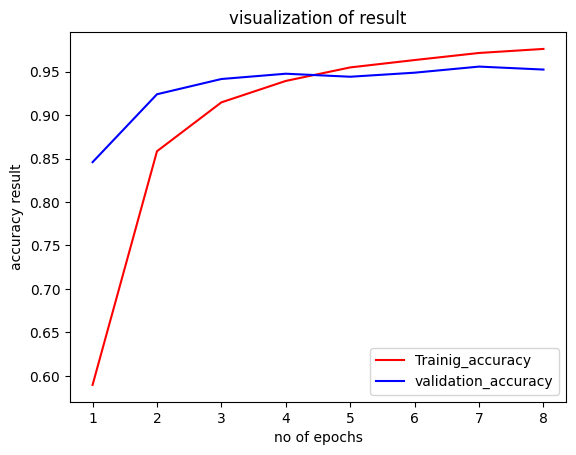

In [55]:
epochs = [i for i in range (1,9)]
plt.plot(epochs,trainig_history.history['accuracy'],color='red', label='Trainig_accuracy')
plt.plot(epochs,trainig_history.history['val_accuracy'],color='blue', label='validation_accuracy')
plt.xlabel("no of epochs")
plt.ylabel("accuracy result")
plt.title("visualization of result")
plt.legend()
plt.show()


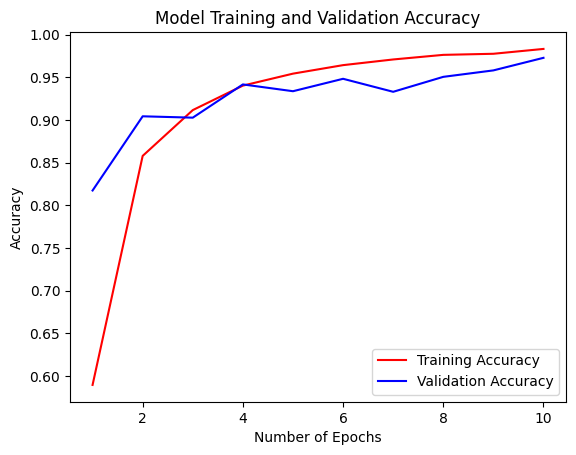

In [115]:
#### Generate a list of epochs
#epochs = [i for i in range(1, len(trainig_history['accuracy']) + 1)]

# Plot training and validation accuracy
#plt.plot(epochs, trainig_history['accuracy'], color='red', label='Training Accuracy')
#plt.plot(epochs, trainig_history['val_accuracy'], color='blue', label='Validation Accuracy')

# Add labels, title, and legend
#plt.xlabel("Number of Epochs")
#plt.ylabel("Accuracy")
#plt.title("Model Training and Validation Accuracy")
#plt.legend()
#plt.show()


## some other metrices for model evaluation

In [56]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [57]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## preprocessing of data that we have done to calculate precision ,recall and f1 score

In [58]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 413s 749ms/step


array([[9.9998188e-01, 1.6028327e-05, 6.2168374e-07, ..., 3.1592478e-12,
        3.0032901e-10, 1.2526423e-11],
       [9.9996531e-01, 3.4057550e-05, 2.0290526e-07, ..., 6.4843069e-14,
        1.2274980e-09, 3.6609812e-11],
       [9.9999988e-01, 1.8192193e-08, 2.5488092e-09, ..., 1.0144427e-15,
        1.3043946e-12, 3.8428459e-13],
       ...,
       [3.7328096e-12, 9.4893660e-15, 2.1204283e-10, ..., 3.9240436e-15,
        1.2538894e-14, 1.0000000e+00],
       [1.2453236e-10, 2.2053686e-13, 3.5542683e-10, ..., 2.2802753e-13,
        9.3637164e-13, 1.0000000e+00],
       [1.9751804e-08, 1.3025320e-08, 4.7480540e-08, ..., 1.7977351e-09,
        2.2983681e-06, 4.8662981e-01]], dtype=float32)

In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 319s 579ms/step


(array([[9.99998808e-01, 8.39581332e-07, 1.52078639e-09, ...,
         3.45840605e-14, 7.53366265e-15, 1.07140414e-12],
        [9.99999285e-01, 6.28911948e-07, 4.83937723e-10, ...,
         1.19625948e-13, 1.86505932e-14, 1.26194714e-11],
        [1.00000000e+00, 1.19894956e-08, 1.34030911e-11, ...,
         1.36096847e-16, 3.05983823e-16, 4.01396337e-13],
        ...,
        [1.39655698e-09, 7.18645195e-12, 4.34267777e-09, ...,
         8.37416681e-12, 4.00066395e-12, 9.99942183e-01],
        [1.67675387e-10, 2.87957023e-13, 3.34406253e-10, ...,
         2.91751866e-12, 1.07990732e-12, 9.99999881e-01],
        [1.11070120e-16, 1.49439302e-19, 3.38815985e-16, ...,
         2.24411128e-19, 6.81194219e-17, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [59]:
## argmax will go inside the y_pred and extract the max value from this and it will return the max value of that index
predicted_categories = tf.argmax(y_pred,axis=1) ## here axis=1 means return the index in columnnwise if it is 0 then rowise

In [60]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 34])>

In [61]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [62]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

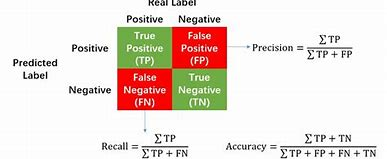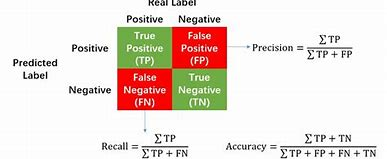

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.90      0.99      0.94       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.82      0.89       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

## confusion matrix

In [65]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[483,   8,   0, ...,   0,   0,   0],
       [  0, 487,   3, ...,   0,   0,   0],
       [  0,   0, 435, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   2, ...,   0,   0, 380]])

In [66]:
cm = confusion_matrix(y_true,predicted_categories)
cm.shape #38 true categories and 38 predicted categories

(38, 38)

## confusion matrix visualization

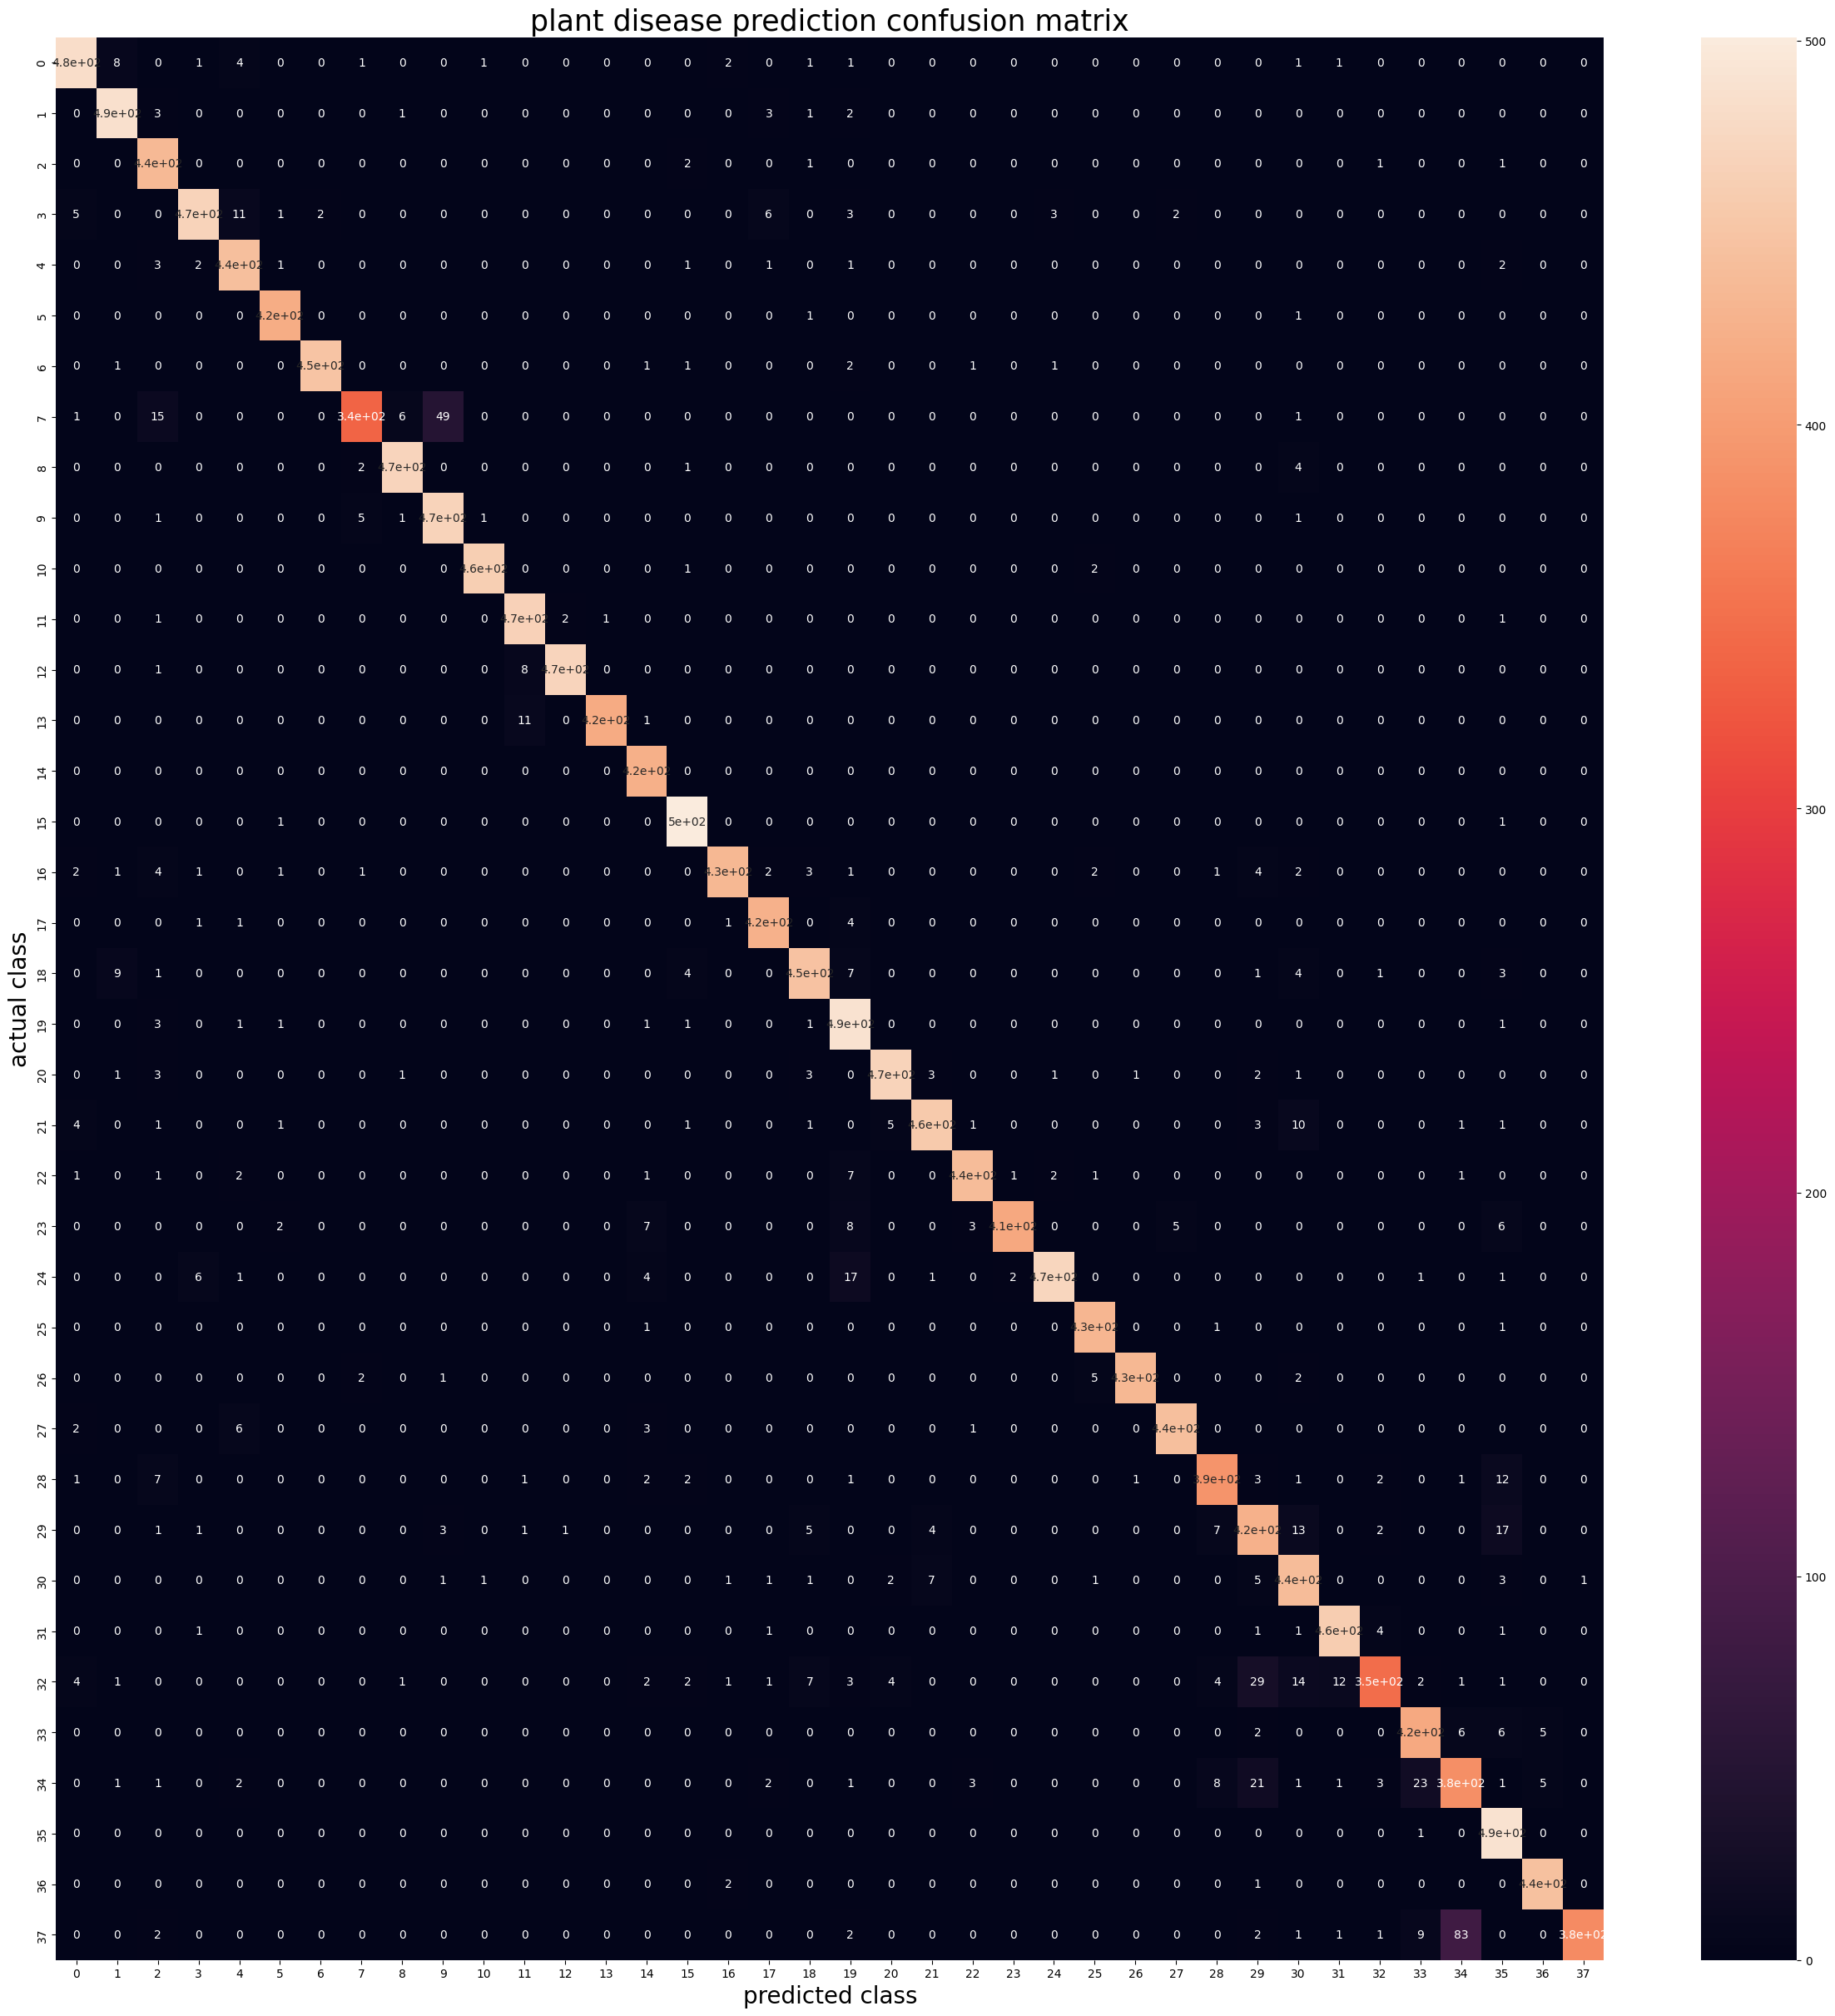

In [69]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("plant disease prediction confusion matrix",fontsize=25)
plt.show()